In [1]:
# Imports
import win32com.client
import numpy as np
import tensorflow
import matplotlib.pyplot as plt
import pandas as pd
import os
import re
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

In [2]:
# Variables that can be changed based on user settings
excelPath = "C:/Queen's/CISC 499/Data/CarotidData-Ver3.xlsx"
dataPath = "C:/Queen's/CISC 499/Data/train_val_test set.xlsx"
passwd = "2018carotid"
num_classes = 2 # Number of different labels

In [3]:
# Load carotid data
carotid_data = pd.read_excel(excelPath, skipfooter=7, usecols="A,B,D,G,H,I,J,M,N,O,P,Q,R,S,T,U,V,W,X,Y,AA,AD,AE,AF,AG,AH,AI,AJ,AK,AL,AM,AY,AZ,BA,BB,BC,BD,BE,BF,BG,BH,BI,BJ,BK,BL,BM,BN,BO,BQ,BR")

# Load training data and labels
train_id = pd.read_excel(dataPath, sheet_name=0, usecols="A")
train_label = pd.read_excel(dataPath, sheet_name=0, usecols="B")
train_data = []
# Match the id's to the correct data rows
for i,row in train_id.iterrows():
    study_id = re.findall('\d+', row["filename"])[0]
    data = carotid_data.loc[carotid_data['Study ID #'] == int(study_id)]
    train_data.append(data.values.tolist()[0][1:]) # Only takes the data columns i.e. not the study ID
# Convert binary values F/M or YES/NO to 1/0
for i, row in enumerate(train_data):
    for j, cell in enumerate(row):
        if cell == 'F' or cell == 'YES' or cell == 'Y':
            train_data[i][j] = 1
        elif cell == 'M' or cell == 'NO' or cell == 'N':
            train_data[i][j] = 0
        elif cell == 'UNKNOWN':
            train_data[i][j] = 2

# Load validation data and labels
validation_id = pd.read_excel(dataPath, sheet_name=1, usecols="A")
validation_label = pd.read_excel(dataPath, sheet_name=1, usecols="B")
validation_data = []
# Match the id's to the correct data rows
for i,row in validation_id.iterrows():
    study_id = re.findall('\d+', row["filename"])[0]
    data = carotid_data.loc[carotid_data['Study ID #'] == int(study_id)]
    validation_data.append(data.values.tolist()[0][1:]) # Only takes the data columns i.e. not the study ID
# Convert binary values F/M or YES/NO to 1/0
for i, row in enumerate(validation_data):
    for j, cell in enumerate(row):
        if cell == 'F' or cell == 'YES' or cell == 'Y':
            validation_data[i][j] = 1
        elif cell == 'M' or cell == 'NO' or cell == 'N':
            validation_data[i][j] = 0
        elif cell == 'UNKNOWN':
            validation_data[i][j] = 2    
    
# Load test data and labels
test_id = pd.read_excel(dataPath, sheet_name=2, usecols="A")
test_label = pd.read_excel(dataPath, sheet_name=2, usecols="B")
test_data = []
# Match the id's to the correct data rows
for i,row in test_id.iterrows():
    study_id = re.findall('\d+', row["filename"])[0]
    data = carotid_data.loc[carotid_data['Study ID #'] == int(study_id)]
    test_data.append(data.values.tolist()[0][1:]) # Only takes the data columns i.e. not the study ID
# Convert binary values F/M or YES/NO to 1/0
for i, row in enumerate(test_data):
    for j, cell in enumerate(row):
        if cell == 'F' or cell == 'YES' or cell == 'Y':
            test_data[i][j] = 1
        elif cell == 'M' or cell == 'NO' or cell == 'N':
            test_data[i][j] = 0
        elif cell == 'UNKNOWN':
            test_data[i][j] = 2

print("Data loaded")

Data loaded


In [12]:
# Create SVM classifier
from sklearn import svm
clf = svm.SVC(C=1,kernel="linear")

train_label = train_label.to_numpy()
train_label = train_label.reshape()

# Train the classifier
clf.fit(train_data, train_label)

# Predict the values for training data
y_pred = clf.predict(train_data)

# Compute accuracy
accuracy = 100.0 * (train_label == y_pred).sum() / len(train_label)
print("Accuracy of SVM classifier =", round(accuracy, 2), "%")

# Predict the values for test data
y_pred = clf.predict(test_data)

# Compute accuracy
accuracy = 100.0 * (test_label == y_pred).sum() / len(test_label)
print("Accuracy of SVM classifier =", round(accuracy, 2), "%")

C:\Users\fokxd\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of SVM classifier = 23210.5 %


ValueError: Unable to coerce to Series, length must be 1: given 49

In [4]:
# Process the data into a readable format for the MLP
train_data = np.asarray(train_data).astype('float32')
train_label = np.reshape(train_label, -1)
train_label = to_categorical(train_label, num_classes)

validation_data = np.asarray(validation_data).astype('float32')
validation_label = np.reshape(validation_label, -1)
validation_label = to_categorical(validation_label, num_classes)

test_data = np.asarray(test_data).astype('float32')
test_label = np.reshape(test_label, -1)
test_label = to_categorical(test_label, num_classes)

# print(train_data)
# print(validation_data)
# print(test_data)

print(len(train_label))
print(len(validation_label))
print(len(test_label))

# print(len(train_data), len(validation_data))

362
72
49


In [5]:
# Create the model
model = Sequential()
model.add(Dense(40, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [6]:
# Configure the model and start training
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_data, train_label, batch_size=32, epochs=50, verbose=1, validation_data=(validation_data, validation_label))

Epoch 1/50
12/12 [==============================] - 0s 10ms/step - loss: 4.1368 - accuracy: 0.5497 - val_loss: 1.5690 - val_accuracy: 0.5139
Epoch 2/50
12/12 [==============================] - 0s 2ms/step - loss: 2.3811 - accuracy: 0.5994 - val_loss: 1.0321 - val_accuracy: 0.6111
Epoch 3/50
12/12 [==============================] - 0s 2ms/step - loss: 1.8490 - accuracy: 0.6215 - val_loss: 1.0017 - val_accuracy: 0.6111
Epoch 4/50
12/12 [==============================] - 0s 2ms/step - loss: 1.5916 - accuracy: 0.5939 - val_loss: 0.9533 - val_accuracy: 0.6111
Epoch 5/50
12/12 [==============================] - 0s 2ms/step - loss: 1.3260 - accuracy: 0.6436 - val_loss: 0.9675 - val_accuracy: 0.5694
Epoch 6/50
12/12 [==============================] - 0s 2ms/step - loss: 1.1810 - accuracy: 0.6519 - val_loss: 1.0299 - val_accuracy: 0.5000
Epoch 7/50
12/12 [==============================] - 0s 2ms/step - loss: 1.0852 - accuracy: 0.6354 - val_loss: 0.9021 - val_accuracy: 0.5972
Epoch 8/50
12/12 [=

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                2000      
                                                                 
 dense_1 (Dense)             (None, 10)                410       
                                                                 
 dense_2 (Dense)             (None, 2)                 22        
                                                                 
Total params: 2,432
Trainable params: 2,432
Non-trainable params: 0
_________________________________________________________________


In [8]:
# EVALUATE THE MODEL
loss, acc = model.evaluate(test_data, test_label, verbose=2)
print("Model, accuracy: {:5.2f}%".format(100 * acc))

2/2 - 0s - loss: 0.7624 - accuracy: 0.6122 - 11ms/epoch - 5ms/step
Model, accuracy: 61.22%


In [9]:
# MAKE PREDICTIONS
predictions = np.argmax(model.predict(test_data), axis=1)

print("Predictions: ", predictions)
print("Ground truth: ", test_label)

Predictions:  [0 1 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 0
 0 0 0 1 1 0 0 0 1 0 1 0]
Ground truth:  [[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


Recall/Sensitivity/True positive rate:  0.5625
Specificity/selectivity/True negative rate:  0.6363636363636364
Precision/Positive predictive value:  0.42857142857142855
Negative predictive value:  0.75
F1 score:  0.4864864864864864


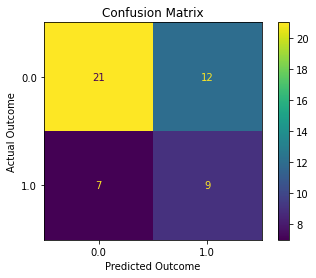

AUC value:  0.5994318181818181


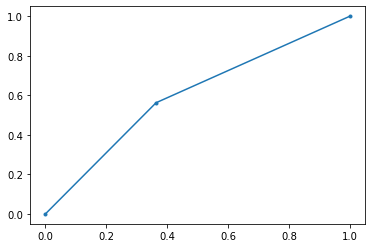

In [10]:
# GENERATE METRICS
cm = confusion_matrix(np.argmax(test_label, axis=1), predictions)
tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
ppv = tp / (tp + fp)
npv = tn / (tn + fn)
f1 = 2 * ((ppv * tpr) / (ppv + tpr))

print("Recall/Sensitivity/True positive rate: ", tpr)
print("Specificity/selectivity/True negative rate: ", tnr)
print("Precision/Positive predictive value: ", ppv)
print("Negative predictive value: ", npv)
print("F1 score: ", f1)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(np.unique(train_label)))
disp.plot()
disp.ax_.set(
                title='Confusion Matrix', 
                xlabel='Predicted Outcome', 
                ylabel='Actual Outcome')
plt.show()

# test roc
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(np.argmax(test_label, axis=1), predictions)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)
print("AUC value: ", auc_keras)

In [11]:
# Try using class weights

# Extract data from .xlsx file
xlApp = win32com.client.Dispatch("Excel.Application")
print("Excel library version:", xlApp.Version)
xlwb = xlApp.Workbooks.Open(excelPath)
xlws = xlwb.Sheets(1)

labels = xlws.Range(xlws.Cells(2,73), xlws.Cells(523,73)).Value

from sklearn.utils import class_weight
label = np.asarray(train_label)
label = np.reshape(label, -1)

class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                 classes=np.unique(label),
                                                 y=label)

print(class_weights)

class_weights = {0: 1,
                 1: 1}

Excel library version: 16.0
[1. 1.]


In [12]:
# Retry MLP again with class weights

# Create the model
model = Sequential()
model.add(Dense(40, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Configure the model and start training
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_data, train_label, batch_size=32, epochs=50, verbose=1, validation_data=(validation_data, validation_label), class_weight=class_weights)

Epoch 1/50
12/12 [==============================] - 0s 9ms/step - loss: 3.9337 - accuracy: 0.5691 - val_loss: 2.4595 - val_accuracy: 0.6250
Epoch 2/50
12/12 [==============================] - 0s 2ms/step - loss: 2.0983 - accuracy: 0.5884 - val_loss: 2.0100 - val_accuracy: 0.4306
Epoch 3/50
12/12 [==============================] - 0s 2ms/step - loss: 1.5011 - accuracy: 0.6630 - val_loss: 1.4895 - val_accuracy: 0.5556
Epoch 4/50
12/12 [==============================] - 0s 2ms/step - loss: 1.2246 - accuracy: 0.5967 - val_loss: 1.2926 - val_accuracy: 0.5972
Epoch 5/50
12/12 [==============================] - 0s 3ms/step - loss: 1.0550 - accuracy: 0.6547 - val_loss: 1.1947 - val_accuracy: 0.5694
Epoch 6/50
12/12 [==============================] - 0s 2ms/step - loss: 0.9576 - accuracy: 0.6796 - val_loss: 1.1174 - val_accuracy: 0.5972
Epoch 7/50
12/12 [==============================] - 0s 2ms/step - loss: 0.8736 - accuracy: 0.7017 - val_loss: 1.0888 - val_accuracy: 0.5833
Epoch 8/50
12/12 [==

In [13]:
# EVALUATE THE MODEL
loss, acc = model.evaluate(test_data, test_label, verbose=2)
print("Model, accuracy: {:5.2f}%".format(100 * acc))

2/2 - 0s - loss: 0.8299 - accuracy: 0.6735 - 11ms/epoch - 6ms/step
Model, accuracy: 67.35%


In [14]:
# MAKE PREDICTIONS
predictions = np.argmax(model.predict(test_data), axis=1)

print("Predictions: ", predictions)
print("Ground truth: ", test_label)

Predictions:  [0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 1 1 1 0 0 0 1 1 1]
Ground truth:  [[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


Recall/Sensitivity/True positive rate:  0.4375
Specificity/selectivity/True negative rate:  0.7878787878787878
Precision/Positive predictive value:  0.5
Negative predictive value:  0.7428571428571429
F1 score:  0.4666666666666667


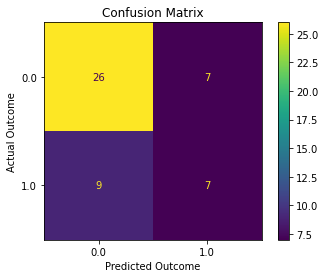

AUC value:  0.6126893939393939


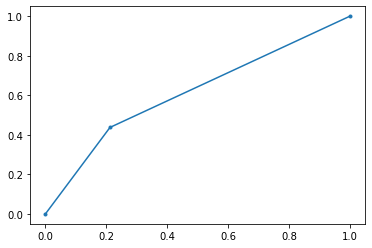

In [15]:
# GENERATE METRICS
cm = confusion_matrix(np.argmax(test_label, axis=1), predictions)
tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
ppv = tp / (tp + fp)
npv = tn / (tn + fn)
f1 = 2 * ((ppv * tpr) / (ppv + tpr))

print("Recall/Sensitivity/True positive rate: ", tpr)
print("Specificity/selectivity/True negative rate: ", tnr)
print("Precision/Positive predictive value: ", ppv)
print("Negative predictive value: ", npv)
print("F1 score: ", f1)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(np.unique(train_label)))
disp.plot()
disp.ax_.set(
                title='Confusion Matrix', 
                xlabel='Predicted Outcome', 
                ylabel='Actual Outcome')
plt.show()

# test roc
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(np.argmax(test_label, axis=1), predictions)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)
print("AUC value: ", auc_keras)

In [16]:
# Try PCA next
from sklearn import decomposition

pca = decomposition.PCA(n_components=10)
pca.fit(train_data)
reduced_train_data = pca.transform(train_data)

pca.fit(validation_data)
reduced_validation_data = pca.transform(validation_data)

pca.fit(test_data)
reduced_test_data = pca.transform(test_data)

In [17]:
# Create the model
model = Sequential()
model.add(Dense(40, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Configure the model and start training
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_data, train_label, batch_size=32, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50
10/10 [==============================] - 0s 13ms/step - loss: 4.0798 - accuracy: 0.4775 - val_loss: 3.0596 - val_accuracy: 0.5890
Epoch 2/50
10/10 [==============================] - 0s 3ms/step - loss: 2.4763 - accuracy: 0.6886 - val_loss: 2.1612 - val_accuracy: 0.6027
Epoch 3/50
10/10 [==============================] - 0s 3ms/step - loss: 1.6093 - accuracy: 0.6678 - val_loss: 1.3747 - val_accuracy: 0.5479
Epoch 4/50
10/10 [==============================] - 0s 3ms/step - loss: 1.3144 - accuracy: 0.6194 - val_loss: 1.0924 - val_accuracy: 0.6438
Epoch 5/50
10/10 [==============================] - 0s 3ms/step - loss: 1.0486 - accuracy: 0.6713 - val_loss: 1.1634 - val_accuracy: 0.6301
Epoch 6/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9714 - accuracy: 0.6955 - val_loss: 0.9486 - val_accuracy: 0.6986
Epoch 7/50
10/10 [==============================] - 0s 3ms/step - loss: 0.8456 - accuracy: 0.6782 - val_loss: 0.8723 - val_accuracy: 0.6849
Epoch 8/50
10/10 [=

In [18]:
# EVALUATE THE MODEL
loss, acc = model.evaluate(test_data, test_label, verbose=2)
print("Model, accuracy: {:5.2f}%".format(100 * acc))

2/2 - 0s - loss: 0.7202 - accuracy: 0.6122 - 12ms/epoch - 6ms/step
Model, accuracy: 61.22%


In [19]:
# MAKE PREDICTIONS
predictions = np.argmax(model.predict(test_data), axis=1)

print("Predictions: ", predictions)
print("Ground truth: ", test_label)

Predictions:  [0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 1 0 1 1 1 0 0 0 0 0]
Ground truth:  [[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


Recall/Sensitivity/True positive rate:  0.25
Specificity/selectivity/True negative rate:  0.7878787878787878
Precision/Positive predictive value:  0.36363636363636365
Negative predictive value:  0.6842105263157895
F1 score:  0.2962962962962963


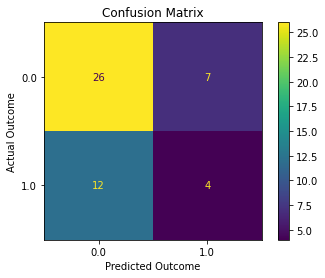

AUC value:  0.5189393939393939


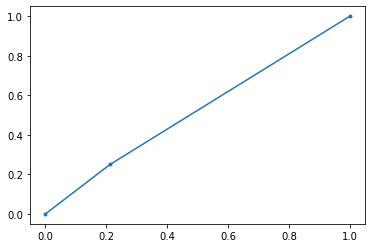

In [20]:
# GENERATE METRICS
cm = confusion_matrix(np.argmax(test_label, axis=1), predictions)
tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
ppv = tp / (tp + fp)
npv = tn / (tn + fn)
f1 = 2 * ((ppv * tpr) / (ppv + tpr))

print("Recall/Sensitivity/True positive rate: ", tpr)
print("Specificity/selectivity/True negative rate: ", tnr)
print("Precision/Positive predictive value: ", ppv)
print("Negative predictive value: ", npv)
print("F1 score: ", f1)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(np.unique(train_label)))
disp.plot()
disp.ax_.set(
                title='Confusion Matrix', 
                xlabel='Predicted Outcome', 
                ylabel='Actual Outcome')
plt.show()

# test roc
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(np.argmax(test_label, axis=1), predictions)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)
print("AUC value: ", auc_keras)